In [1]:
import pandas as pd
import numpy as np


data = pd.read_csv('winequality-red.csv')
data.describe()

data = data.ffill()
data.replace('?', 0, inplace=True)

data.head(100)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
95,4.7,0.600,0.17,2.3,0.058,17.0,106.0,0.9932,3.85,0.60,12.9,6
96,6.8,0.775,0.00,3.0,0.102,8.0,23.0,0.9965,3.45,0.56,10.7,5
97,7.0,0.500,0.25,2.0,0.070,3.0,22.0,0.9963,3.25,0.63,9.2,5
98,7.6,0.900,0.06,2.5,0.079,5.0,10.0,0.9967,3.39,0.56,9.8,5


<Axes: >

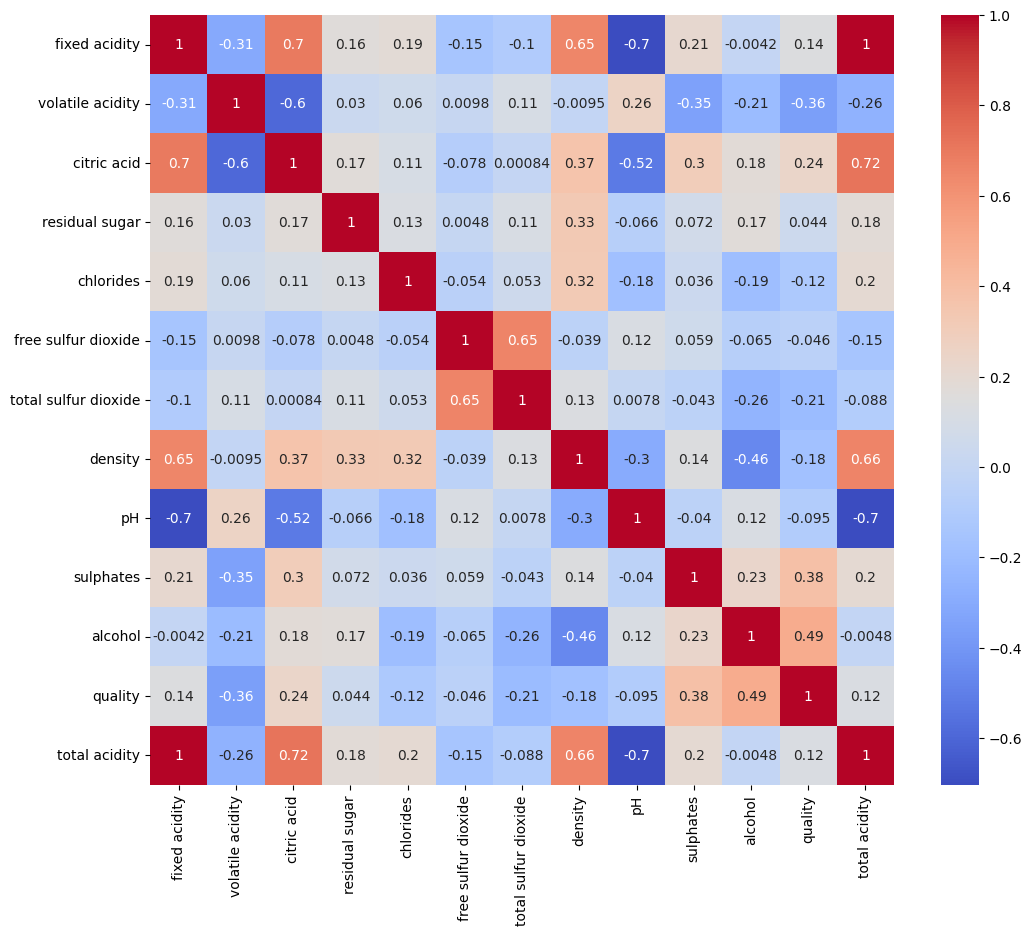

In [2]:
#Statistical Analysis and cleanup
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt


data = data[(np.abs(stats.zscore(data['fixed acidity'])) < 3)]
data = data[(np.abs(stats.zscore(data['volatile acidity'])) < 3)]
data = data[(np.abs(stats.zscore(data['citric acid'])) < 3)]
data = data[(np.abs(stats.zscore(data['residual sugar'])) < 3)]
data = data[(np.abs(stats.zscore(data['chlorides'])) < 3)]
data = data[(np.abs(stats.zscore(data['free sulfur dioxide'])) < 3)]
data = data[(np.abs(stats.zscore(data['total sulfur dioxide'])) < 3)]
data = data[(np.abs(stats.zscore(data['density'])) < 3)]
data = data[(np.abs(stats.zscore(data['pH'])) < 3)]
data = data[(np.abs(stats.zscore(data['alcohol'])) < 3)]
data = data[(np.abs(stats.zscore(data['sulphates'])) < 3)]
data['total acidity'] = data['fixed acidity'] + data['volatile acidity'] + data['citric acid']

corrmat = data.corr()
plt.figure(figsize=(12, 10)) 
sns.heatmap(corrmat, annot=True, cmap='coolwarm')

In [3]:
Y = data['quality']
X = data.drop('quality', axis=1)

In [4]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
DT = DecisionTreeClassifier(max_depth=3, random_state=42)


# Perform 10-fold cross-validation
cv_scores = cross_val_score(DT, X, Y, cv=10)

# Output the cross-validation scores for each fold
print(f"Max Decision Tree score: {cv_scores.max()}")


Max Decision Tree score: 0.6153846153846154


C:\Users\shehr\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(


In [5]:
#KNN
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

scaler = StandardScaler()
# 
X_scaled = scaler.fit_transform(X)

knn = KNeighborsClassifier(n_neighbors=3)

cv_scores = cross_val_score(knn, X_scaled, Y, cv=10)

# Output the cross-validation scores for each fold
print(f"Max KNN score: {cv_scores.max()}")


Max KNN score: 0.5034965034965035


C:\Users\shehr\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(


In [6]:
#SVC
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

#Find best parameters using Hyperparameter Tuning

# param_grid = {
#     'C': [0.1, 1, 10, 100],
#     'gamma': ['scale', 'auto', 0.01, 0.1, 1],
#     'kernel': ['linear', 'rbf', 'poly']
# }
# svc = SVC()
# grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, 
#                              scoring='accuracy', cv=5, verbose=2, n_jobs=-1)
# grid_search.fit(X_scaled, Y)
# best_params = grid_search.best_params_
# best_score = grid_search.best_score_
# print(best_params,best_score)
# implement best_params

svc = SVC(C=10, gamma='scale', kernel= 'rbf')
cv_scores = cross_val_score(svc, X_scaled, Y, cv=10)

# Output the cross-validation scores for each fold
print(f"Max SVC score: {cv_scores.max()}")


C:\Users\shehr\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(


Max SVC score: 0.6433566433566433


In [9]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier

preprocessor = ColumnTransformer(
    transformers=[
        ('scaler', StandardScaler(), [0, 1, 2, 3,4,5,6,7,8,9,10,11]),  # Scale all features for SVC and KNN
        ('none', 'passthrough', [0, 1, 2, 3,4,5,6,7,8,9,10,11]), # Pass through the original features for Decision Tree
    ]
)

base_models = [
    ('svc', Pipeline(steps=[('preprocessor', preprocessor), ('svc', SVC(C=10, gamma='scale', kernel= 'rbf',probability=True))])),
    ('decision_tree', DecisionTreeClassifier()),
    ('knn', Pipeline(steps=[('preprocessor', preprocessor), ('knn', KNeighborsClassifier())]))
]

# Create the meta-model
meta_model = RandomForestClassifier(n_estimators=50)

stacked_pipeline = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model,
    cv=10
)

cv_scores = cross_val_score(stacked_pipeline, X, Y, cv=8)

# Output the cross-validation scores for each fold
print(f"Max stacked pipleine score: {cv_scores.max()}")


C:\Users\shehr\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=8.
  warnings.warn(
C:\Users\shehr\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\shehr\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\shehr\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\shehr\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y 

Max stacked pipleine score: 0.6536312849162011
